In [1]:
import pandas as pd 
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# Initial review of health_spend dataset

In [2]:
health_spend = pd.read_csv('government health spending.csv')

In [3]:
# first view of the data shows that there are 17 columns.  also there are null values throughout the dataset
health_spend.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833,1.25,1.61,2.52,2.81,3.5,3.75,3.91,4.39
1,Albania,13.9,17.10,14.2,18.60,28.10,27.2,30.5,32.500,40.60,63.90,71.40,75.50,88.8,109.00,107.00,94.00
2,Algeria,46.8,48.00,49.7,48.70,45.50,45.9,52.5,54.100,62.60,63.20,69.30,81.70,109.0,148.00,143.00,139.00
3,Andorra,897.0,983.00,967.0,1340.00,942.00,862.0,890.0,1020.000,1300.00,1520.00,1630.00,1850.00,2100.0,2370.00,2360.00,2170.00
4,Angola,13.5,8.72,10.5,6.65,6.55,12.5,18.3,14.300,19.40,19.70,27.10,50.90,68.4,126.00,181.00,102.00


In [4]:
# null values present
health_spend.tail()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
185,Venezuela,61.20,45.00,51.80,57.10,85.80,114.00,120.00,81.70,72.50,99.00,128.00,162.0,222.0,269.0,276.0,232.0
186,Vietnam,4.92,5.36,5.66,6.12,6.32,6.47,7.21,6.83,8.15,8.37,9.84,15.3,23.4,23.8,28.9,31.4
187,Yemen,12.40,11.00,9.44,10.10,10.80,13.60,14.30,14.20,16.60,14.50,14.30,16.3,17.1,21.1,16.8,15.3
188,Zambia,13.20,13.00,16.80,13.60,9.02,9.23,11.70,14.70,16.20,18.40,24.10,35.0,31.1,43.2,36.7,43.9
189,Zimbabwe,28.10,29.40,30.10,29.40,17.60,31.50,25.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# datatypes are 16 floats and 1 object which is consistent with the content of the dataset
health_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  190 non-null    object 
 1   1995     187 non-null    float64
 2   1996     188 non-null    float64
 3   1997     188 non-null    float64
 4   1998     189 non-null    float64
 5   1999     189 non-null    float64
 6   2000     188 non-null    float64
 7   2001     189 non-null    float64
 8   2002     188 non-null    float64
 9   2003     188 non-null    float64
 10  2004     188 non-null    float64
 11  2005     188 non-null    float64
 12  2006     188 non-null    float64
 13  2007     188 non-null    float64
 14  2008     188 non-null    float64
 15  2009     188 non-null    float64
 16  2010     185 non-null    float64
dtypes: float64(16), object(1)
memory usage: 25.4+ KB


In [6]:
health_spend.shape

(190, 17)

In [7]:
health_spend.describe()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
count,187.000000,188.000000,188.000000,189.000000,189.000000,188.000000,189.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,185.000000
mean,308.544652,316.944787,305.288138,307.580212,319.198672,311.001984,317.846402,354.980335,430.466755,491.852856,528.066862,564.017745,642.441128,713.994947,705.679362,729.568432
std,605.604536,610.201051,570.002270,579.597404,610.194953,585.480792,589.035101,681.949044,831.426646,959.642039,1018.637107,1069.209850,1208.955090,1313.696891,1290.591748,1314.869747
min,0.190000,0.030000,0.040000,0.200000,0.270000,0.390000,0.310000,0.270000,0.490000,0.667000,0.460000,0.836000,0.882000,1.180000,1.620000,2.090000
25%,12.900000,12.250000,12.450000,13.400000,9.900000,11.100000,11.700000,11.125000,13.800000,16.275000,23.325000,27.700000,31.550000,35.575000,32.325000,34.500000
50%,51.600000,57.400000,58.150000,57.000000,61.900000,60.500000,63.600000,70.450000,84.600000,97.750000,106.500000,115.500000,137.500000,150.000000,155.500000,187.000000
75%,243.000000,234.500000,247.250000,251.000000,250.000000,273.500000,266.000000,247.500000,318.500000,345.250000,353.500000,391.250000,509.250000,576.000000,543.250000,634.000000
max,2600.000000,2610.000000,2450.000000,2590.000000,2750.000000,2960.000000,2850.000000,3580.000000,4170.000000,5180.000000,5470.000000,5940.000000,6410.000000,6800.000000,6940.000000,6910.000000


In [8]:
# determining the amount of null values in each column of the dataset
null_counts = health_spend.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

2010    5
1995    3
2009    2
2008    2
2007    2
2006    2
2005    2
2004    2
2003    2
2002    2
2000    2
1997    2
1996    2
2001    1
1999    1
1998    1
dtype: int64

In [9]:
# display of rows with null values
# in reviewing the rows decided to backfill with values in same row nulls for countries with low spend in early years
# for countries with larger spend and nulls in later years decided to forward fill within same row for missing values 
health_spend_null = health_spend[health_spend.isna().any(axis=1)]
health_spend_null

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833,1.25,1.61,2.52,2.81,3.50,3.75,3.91,4.39
73,Honduras,20.40,17.60,19.20,25.80,25.90,41.50,43.60,47.400,59.00,55.40,53.60,54.30,62.80,70.80,89.20,NaN
79,Iraq,NaN,0.03,0.04,0.30,0.48,0.39,0.43,0.270,8.32,45.00,41.70,42.10,75.00,120.00,157.00,200.00
95,Liberia,NaN,NaN,NaN,2.03,2.49,2.63,2.86,1.920,1.56,1.96,2.67,3.37,5.88,9.07,9.66,9.49
108,Mexico,74.20,75.80,99.90,108.00,132.00,153.00,167.00,174.000,175.00,199.00,215.00,233.00,256.00,281.00,253.00,NaN
122,Nicaragua,37.20,34.50,23.40,26.20,23.70,29.00,29.50,30.000,34.80,36.70,40.20,42.90,50.80,57.70,57.00,NaN
153,Somalia,2.01,2.19,2.62,3.42,3.34,3.04,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,South Korea,170.00,206.00,202.00,153.00,212.00,NaN,296.00,319.000,365.00,415.00,526.00,659.00,762.00,692.00,689.00,848.00
189,Zimbabwe,28.10,29.40,30.10,29.40,17.60,31.50,25.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# backfilling null values with values within same row
# this method was taken because of the magnitude of the spend between countries varied so greatly
health_spend_temp = health_spend.fillna(method='bfill', axis=1)      
   

In [15]:
# forward filling nulls with values within same row
health_spend_edit = health_spend_temp.fillna(method='ffill', axis=1)


In [16]:
#verfying null values filled
null_counts = health_spend_edit.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [17]:
health_spend_edit.shape

(190, 17)

# Initial review of female mortality rate dataset

In [18]:
mortrate_fem = pd.read_csv('mort_rate_fem.csv')

In [19]:
# first view of the data shows that there are 60 columns.  also there are null values throughout the dataset
mortrate_fem.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,551.0,546.0,540.0,535.0,529.0,524.0,519.0,514.0,508.0,...,234.0,229.0,224.0,220.0,215.0,211.0,207.0,202.0,198.0,193.0
1,Albania,151.0,140.0,129.0,130.0,131.0,132.0,133.0,134.0,132.0,...,57.0,55.7,54.4,53.2,52.5,51.9,51.2,50.5,49.9,49.5
2,Algeria,323.0,320.0,316.0,313.0,310.0,307.0,303.0,300.0,297.0,...,93.6,91.9,90.2,88.4,87.1,85.8,84.4,83.1,81.8,80.7
3,Angola,498.0,494.0,491.0,486.0,482.0,477.0,472.0,468.0,463.0,...,243.0,234.0,225.0,216.0,212.0,209.0,206.0,203.0,200.0,220.0
4,Antigua and Barbuda,245.0,241.0,238.0,234.0,231.0,227.0,224.0,220.0,217.0,...,116.0,114.0,112.0,111.0,110.0,108.0,107.0,106.0,104.0,83.1


In [20]:
mortrate_fem.tail()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
182,Venezuela,250.0,243.0,236.0,230.0,223.0,216.0,209.0,202.0,196.0,...,94.9,94.2,93.5,92.9,91.9,91.0,90.0,89.0,88.1,94.8
183,Vietnam,181.0,175.0,169.0,166.0,164.0,161.0,158.0,156.0,165.0,...,70.0,69.6,69.1,68.6,67.9,67.2,66.4,65.7,65.0,76.4
184,Yemen,460.0,460.0,460.0,451.0,442.0,433.0,424.0,415.0,407.0,...,215.0,212.0,209.0,206.0,203.0,201.0,198.0,195.0,193.0,175.0
185,Zambia,367.0,363.0,359.0,356.0,353.0,349.0,346.0,343.0,338.0,...,376.0,345.0,314.0,283.0,274.0,265.0,255.0,246.0,237.0,222.0
186,Zimbabwe,306.0,303.0,299.0,296.0,293.0,290.0,286.0,283.0,280.0,...,527.0,484.0,442.0,399.0,379.0,359.0,339.0,320.0,300.0,338.0


In [21]:
mortrate_fem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  187 non-null    object 
 1   1960     181 non-null    float64
 2   1961     180 non-null    float64
 3   1962     180 non-null    float64
 4   1963     180 non-null    float64
 5   1964     180 non-null    float64
 6   1965     180 non-null    float64
 7   1966     180 non-null    float64
 8   1967     180 non-null    float64
 9   1968     180 non-null    float64
 10  1969     180 non-null    float64
 11  1970     181 non-null    float64
 12  1971     180 non-null    float64
 13  1972     180 non-null    float64
 14  1973     180 non-null    float64
 15  1974     180 non-null    float64
 16  1975     180 non-null    float64
 17  1976     180 non-null    float64
 18  1977     180 non-null    float64
 19  1978     180 non-null    float64
 20  1979     180 non-null    float64
 21  1980     181 non

In [22]:
mortrate_fem.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,181.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000,...,184.000000,184.000000,184.000000,184.000000,184.00000,182.000000,180.000000,179.000000,168.000000,153.000000
mean,282.158011,278.479444,274.566667,270.474444,266.076667,262.131111,258.307222,254.084444,250.47000,247.089444,...,152.618478,148.170652,144.104348,139.651087,137.11087,134.906593,132.958333,130.898324,133.393452,138.583007
std,133.031248,132.407126,131.129140,129.625780,128.648435,127.007785,125.409216,124.376843,122.43125,120.299698,...,107.949261,103.314980,98.691316,94.615931,92.36119,90.690013,88.769407,86.724956,84.909945,82.567667
min,81.800000,82.100000,82.100000,82.000000,77.600000,76.900000,77.700000,76.400000,77.50000,81.800000,...,39.300000,36.300000,36.900000,34.400000,35.30000,34.800000,34.300000,33.900000,32.900000,31.900000
25%,164.000000,162.750000,159.750000,156.500000,150.500000,145.000000,142.000000,137.750000,134.25000,131.500000,...,75.925000,74.400000,71.925000,69.825000,68.50000,67.575000,67.000000,67.050000,71.900000,77.200000
50%,268.000000,261.500000,256.000000,252.000000,248.500000,243.500000,238.500000,234.000000,227.50000,222.000000,...,115.000000,113.000000,110.500000,107.000000,105.00000,103.500000,101.500000,99.500000,101.500000,116.000000
75%,397.000000,394.250000,389.000000,374.500000,370.000000,366.000000,360.000000,357.000000,346.25000,337.500000,...,215.000000,210.500000,206.500000,196.750000,193.25000,193.250000,193.000000,184.000000,189.000000,193.000000
max,557.000000,554.000000,552.000000,547.000000,542.000000,537.000000,531.000000,526.000000,521.00000,516.000000,...,527.000000,508.000000,493.000000,477.000000,474.00000,470.000000,466.000000,463.000000,459.000000,419.000000


In [23]:
mortrate_fem.shape

(187, 60)

In [24]:
null_counts = mortrate_fem.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

2018    34
2017    19
2016     8
1981     7
1979     7
1978     7
1977     7
1976     7
1975     7
1974     7
1973     7
1972     7
1971     7
1982     7
1969     7
1968     7
1967     7
1966     7
1965     7
1964     7
1963     7
1962     7
1961     7
2015     7
1980     6
1970     6
1960     6
1988     5
2014     5
1987     5
1986     5
1985     5
1984     5
1983     5
1989     5
2009     3
2006     3
2007     3
2008     3
2012     3
2010     3
2011     3
2004     3
2013     3
2005     3
1999     3
2003     3
2002     3
2001     3
1998     3
1997     3
1996     3
1995     3
1994     3
1993     3
1992     3
1991     3
1990     1
dtype: int64

In [162]:
mortrate_fem_null = mortrate_fem[mortrate_fem.isna().any(axis=1)]
mortrate_fem_null

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
7,Australia,116.0,109.0,113.0,116.0,118.0,119.0,120.0,117.0,117.0,...,47.9,45.7,46.1,44.4,45.0,44.8,45.2,44.7,NaN,NaN
8,Austria,118.0,113.0,113.0,113.0,109.0,110.0,108.0,109.0,105.0,...,50.1,48.7,49.4,46.7,45.3,46.0,44.7,43.8,41.8,NaN
14,Belarus,105.0,105.0,109.0,105.0,97.3,99.0,96.9,100.0,96.2,...,113.0,112.0,114.0,97.5,95.3,90.0,82.4,82.6,NaN,NaN
24,Bulgaria,114.0,111.0,113.0,109.0,102.0,101.0,101.0,101.0,100.0,...,87.3,87.9,85.7,82.3,82.1,88.3,86.6,86.5,86.5,NaN
29,Canada,110.0,106.0,108.0,107.0,104.0,105.0,104.0,104.0,103.0,...,54.8,52.6,52.7,52.5,51.1,51.5,50.9,51.8,NaN,NaN
44,Czech Republic,112.0,109.0,108.0,105.0,106.0,106.0,104.0,104.0,107.0,...,62.8,60.3,59.5,58.3,56.7,53.4,52.9,53.3,51.3,NaN
45,Denmark,106.0,103.0,101.0,104.0,98.5,103.0,101.0,102.0,102.0,...,64.9,63.0,59.0,57.6,54.6,51.8,51.4,51.7,NaN,NaN
47,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Estonia,111.0,113.0,111.0,110.0,105.0,101.0,106.0,96.7,106.0,...,77.5,67.8,70.9,67.9,67.0,65.3,62.8,67.2,56.1,NaN
59,France,115.0,109.0,112.0,112.0,107.0,109.0,106.0,105.0,104.0,...,55.4,53.7,52.6,51.6,50.5,49.3,49.4,48.3,48.2,NaN


In [163]:
# dropping countries Dominica, Marshall Islands and St Kitts with mostly null values
   # mortrate_fem_temp = mortrate_fem[mortrate_fem.country != 'Dominica'] 
mortrate_fem.drop([47,104,156],0,inplace=True)

In [164]:
# validating removal of rows
mortrate_fem_null = mortrate_fem[mortrate_fem.isna().any(axis=1)]
mortrate_fem_null

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
7,Australia,116.0,109.0,113.0,116.0,118.0,119.0,120.0,117.0,117.0,...,47.9,45.7,46.1,44.4,45.0,44.8,45.2,44.7,NaN,NaN
8,Austria,118.0,113.0,113.0,113.0,109.0,110.0,108.0,109.0,105.0,...,50.1,48.7,49.4,46.7,45.3,46.0,44.7,43.8,41.8,NaN
14,Belarus,105.0,105.0,109.0,105.0,97.3,99.0,96.9,100.0,96.2,...,113.0,112.0,114.0,97.5,95.3,90.0,82.4,82.6,NaN,NaN
24,Bulgaria,114.0,111.0,113.0,109.0,102.0,101.0,101.0,101.0,100.0,...,87.3,87.9,85.7,82.3,82.1,88.3,86.6,86.5,86.5,NaN
29,Canada,110.0,106.0,108.0,107.0,104.0,105.0,104.0,104.0,103.0,...,54.8,52.6,52.7,52.5,51.1,51.5,50.9,51.8,NaN,NaN
44,Czech Republic,112.0,109.0,108.0,105.0,106.0,106.0,104.0,104.0,107.0,...,62.8,60.3,59.5,58.3,56.7,53.4,52.9,53.3,51.3,NaN
45,Denmark,106.0,103.0,101.0,104.0,98.5,103.0,101.0,102.0,102.0,...,64.9,63.0,59.0,57.6,54.6,51.8,51.4,51.7,NaN,NaN
54,Estonia,111.0,113.0,111.0,110.0,105.0,101.0,106.0,96.7,106.0,...,77.5,67.8,70.9,67.9,67.0,65.3,62.8,67.2,56.1,NaN
59,France,115.0,109.0,112.0,112.0,107.0,109.0,106.0,105.0,104.0,...,55.4,53.7,52.6,51.6,50.5,49.3,49.4,48.3,48.2,NaN
63,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.2,53.3,52.9,51.1,51.7,49.6,50.2,49.5,48.0,NaN


In [165]:
mortrate_fem_temp = mortrate_fem.fillna(method='backfill', axis=1)

In [166]:
mortrate_fem_edit = mortrate_fem_temp.fillna(method='ffill', axis=1)


In [167]:
#verfying null values filled
null_counts = mortrate_fem_edit.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [168]:
mortrate_fem_edit.shape

(184, 60)

# Initial view of male mortality rate dataset

In [169]:
mortrate_male = pd.read_csv('mort_rate_male.csv')

In [170]:
mortrate_male.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,605.0,599.0,593.0,588.0,582.0,577.0,571.0,566.0,560.0,...,276.0,271.0,266.0,261.0,257.0,253.0,249.0,245.0,240.0,238.0
1,Albania,160.0,151.0,141.0,143.0,145.0,146.0,148.0,150.0,152.0,...,106.0,106.0,106.0,106.0,104.0,102.0,99.2,96.8,94.5,93.3
2,Algeria,373.0,370.0,366.0,363.0,360.0,357.0,354.0,350.0,348.0,...,119.0,116.0,114.0,112.0,110.0,109.0,107.0,106.0,104.0,103.0
3,Angola,562.0,558.0,555.0,550.0,545.0,541.0,536.0,532.0,527.0,...,316.0,307.0,298.0,289.0,286.0,283.0,280.0,277.0,273.0,327.0
4,Antigua and Barbuda,276.0,272.0,269.0,266.0,263.0,261.0,258.0,255.0,252.0,...,164.0,162.0,160.0,158.0,156.0,155.0,153.0,151.0,150.0,127.0


In [171]:
mortrate_male.tail()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
182,Venezuela,304.0,299.0,293.0,288.0,284.0,280.0,276.0,271.0,268.0,...,204.0,202.0,201.0,199.0,197.0,195.0,193.0,191.0,189.0,207.0
183,Vietnam,290.0,284.0,277.0,277.0,277.0,277.0,277.0,277.0,301.0,...,195.0,193.0,191.0,189.0,187.0,185.0,183.0,181.0,178.0,189.0
184,Yemen,518.0,518.0,518.0,510.0,501.0,493.0,484.0,476.0,468.0,...,261.0,258.0,255.0,252.0,250.0,247.0,245.0,243.0,240.0,220.0
185,Zambia,425.0,420.0,416.0,412.0,409.0,406.0,402.0,399.0,395.0,...,450.0,421.0,392.0,363.0,359.0,355.0,350.0,346.0,342.0,321.0
186,Zimbabwe,362.0,358.0,354.0,351.0,348.0,345.0,342.0,338.0,335.0,...,576.0,534.0,491.0,448.0,431.0,414.0,397.0,380.0,362.0,373.0


In [172]:
mortrate_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  187 non-null    object 
 1   1960     181 non-null    float64
 2   1961     180 non-null    float64
 3   1962     180 non-null    float64
 4   1963     180 non-null    float64
 5   1964     180 non-null    float64
 6   1965     180 non-null    float64
 7   1966     180 non-null    float64
 8   1967     180 non-null    float64
 9   1968     180 non-null    float64
 10  1969     180 non-null    float64
 11  1970     181 non-null    float64
 12  1971     180 non-null    float64
 13  1972     180 non-null    float64
 14  1973     180 non-null    float64
 15  1974     180 non-null    float64
 16  1975     180 non-null    float64
 17  1976     180 non-null    float64
 18  1977     180 non-null    float64
 19  1978     180 non-null    float64
 20  1979     180 non-null    float64
 21  1980     181 non

In [173]:
mortrate_male.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,181.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,182.000000,180.000000,179.000000,168.000000,153.000000
mean,347.220994,343.900000,340.388889,336.472222,331.922222,328.461111,324.683333,320.933333,317.961111,315.538889,...,219.985870,215.338043,210.697826,206.097826,202.507065,199.245604,196.059444,193.263128,195.969643,203.198693
std,124.726081,123.468002,121.870496,120.044193,118.989904,116.954194,115.329766,113.750958,111.776981,109.392143,...,111.536286,108.101061,104.813313,101.419568,99.437673,97.406041,95.042842,93.164534,90.071259,91.111961
min,141.000000,137.000000,139.000000,138.000000,142.000000,139.000000,139.000000,143.000000,143.000000,143.000000,...,69.500000,69.200000,58.900000,66.900000,66.900000,63.300000,62.300000,58.200000,60.800000,41.500000
25%,232.000000,227.750000,227.500000,221.750000,220.500000,225.500000,222.500000,221.750000,220.750000,223.000000,...,134.750000,131.750000,128.250000,124.250000,119.750000,117.750000,121.000000,123.000000,131.000000,144.000000
50%,332.000000,326.500000,320.500000,315.000000,312.000000,308.500000,304.500000,300.500000,297.500000,295.500000,...,203.500000,198.500000,194.500000,189.000000,185.500000,184.000000,182.000000,181.000000,187.000000,194.000000
75%,443.000000,442.250000,439.500000,430.250000,425.500000,419.000000,410.000000,403.250000,397.500000,394.750000,...,283.000000,278.250000,272.750000,268.250000,266.250000,260.750000,253.750000,249.000000,248.500000,251.000000
max,622.000000,621.000000,620.000000,611.000000,603.000000,594.000000,585.000000,577.000000,566.000000,563.000000,...,594.000000,589.000000,584.000000,578.000000,572.000000,566.000000,561.000000,555.000000,549.000000,546.000000


In [174]:
mortrate_male.shape

(187, 60)

In [175]:
null_counts2 = mortrate_male.isnull().sum()
null_counts2[null_counts2 > 0].sort_values(ascending=False)

2018    34
2017    19
2016     8
1981     7
1979     7
1978     7
1977     7
1976     7
1975     7
1974     7
1973     7
1972     7
1971     7
1982     7
1969     7
1968     7
1967     7
1966     7
1965     7
1964     7
1963     7
1962     7
1961     7
2015     7
1980     6
1970     6
1960     6
1988     5
2014     5
1987     5
1986     5
1985     5
1984     5
1983     5
1989     5
2009     3
2006     3
2007     3
2008     3
2012     3
2010     3
2011     3
2004     3
2013     3
2005     3
1999     3
2003     3
2002     3
2001     3
1998     3
1997     3
1996     3
1995     3
1994     3
1993     3
1992     3
1991     3
1990     1
dtype: int64

In [176]:
mortrate_male_null = mortrate_male[mortrate_male.isna().any(axis=1)]
mortrate_male_null

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
7,Australia,200.0,199.0,203.0,202.0,210.0,208.0,206.0,206.0,209.0,...,81.8,78.6,78.3,75.7,75.4,76.8,78.3,75.8,NaN,NaN
8,Austria,215.0,206.0,206.0,201.0,200.0,203.0,201.0,203.0,203.0,...,103.0,100.0,94.4,91.3,89.4,85.6,84.7,80.4,79.0,NaN
14,Belarus,205.0,199.0,204.0,200.0,194.0,198.0,199.0,203.0,208.0,...,330.0,334.0,336.0,287.0,274.0,261.0,245.0,235.0,NaN,NaN
24,Bulgaria,165.0,162.0,166.0,160.0,154.0,152.0,155.0,164.0,161.0,...,204.0,197.0,194.0,188.0,185.0,190.0,186.0,187.0,184.0,NaN
29,Canada,193.0,191.0,191.0,192.0,191.0,192.0,194.0,193.0,190.0,...,87.7,85.4,82.9,82.4,81.1,81.3,81.1,82.6,NaN,NaN
44,Czech Republic,201.0,194.0,202.0,200.0,197.0,199.0,197.0,203.0,213.0,...,139.0,135.0,132.0,126.0,121.0,115.0,112.0,109.0,109.0,NaN
45,Denmark,151.0,151.0,157.0,156.0,157.0,159.0,156.0,157.0,153.0,...,107.0,105.0,97.2,92.6,90.1,86.7,82.9,82.4,NaN,NaN
47,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Estonia,245.0,239.0,236.0,245.0,236.0,232.0,234.0,243.0,247.0,...,229.0,203.0,204.0,198.0,169.0,181.0,170.0,168.0,155.0,NaN
59,France,217.0,214.0,219.0,222.0,212.0,218.0,213.0,214.0,213.0,...,118.0,116.0,113.0,109.0,105.0,100.0,102.0,97.9,95.4,NaN


In [177]:
# dropping countries Dominica, Marshall Islands and St Kitts with mostly null values
mortrate_male.drop([47,104,156],0,inplace=True)

In [178]:
# validating removal of rows
mortrate_male_null = mortrate_male[mortrate_male.isna().any(axis=1)]
mortrate_male_null

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
7,Australia,200.0,199.0,203.0,202.0,210.0,208.0,206.0,206.0,209.0,...,81.8,78.6,78.3,75.7,75.4,76.8,78.3,75.8,NaN,NaN
8,Austria,215.0,206.0,206.0,201.0,200.0,203.0,201.0,203.0,203.0,...,103.0,100.0,94.4,91.3,89.4,85.6,84.7,80.4,79.0,NaN
14,Belarus,205.0,199.0,204.0,200.0,194.0,198.0,199.0,203.0,208.0,...,330.0,334.0,336.0,287.0,274.0,261.0,245.0,235.0,NaN,NaN
24,Bulgaria,165.0,162.0,166.0,160.0,154.0,152.0,155.0,164.0,161.0,...,204.0,197.0,194.0,188.0,185.0,190.0,186.0,187.0,184.0,NaN
29,Canada,193.0,191.0,191.0,192.0,191.0,192.0,194.0,193.0,190.0,...,87.7,85.4,82.9,82.4,81.1,81.3,81.1,82.6,NaN,NaN
44,Czech Republic,201.0,194.0,202.0,200.0,197.0,199.0,197.0,203.0,213.0,...,139.0,135.0,132.0,126.0,121.0,115.0,112.0,109.0,109.0,NaN
45,Denmark,151.0,151.0,157.0,156.0,157.0,159.0,156.0,157.0,153.0,...,107.0,105.0,97.2,92.6,90.1,86.7,82.9,82.4,NaN,NaN
54,Estonia,245.0,239.0,236.0,245.0,236.0,232.0,234.0,243.0,247.0,...,229.0,203.0,204.0,198.0,169.0,181.0,170.0,168.0,155.0,NaN
59,France,217.0,214.0,219.0,222.0,212.0,218.0,213.0,214.0,213.0,...,118.0,116.0,113.0,109.0,105.0,100.0,102.0,97.9,95.4,NaN
63,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.0,102.0,98.6,95.5,94.7,91.1,92.5,90.0,86.5,NaN


In [179]:
mortrate_male_temp = mortrate_male.fillna(method='backfill', axis=1)

In [180]:
mortrate_male_edit = mortrate_male_temp.fillna(method='ffill', axis=1)

In [181]:
#verfying null values filled
null_counts2 = mortrate_male_edit.isnull().sum()
null_counts2[null_counts2 > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [182]:
# after dropping 3 columns with mostly null values, dataset has 184 rows and 60 columns
mortrate_male_edit.shape

(184, 60)

In [183]:
# checking that countries are the same between mortrate_fem and mortrate_male datasets
missing = mortrate_male_edit['country'].isin(mortrate_fem_edit['country'])


In [184]:
missing_countries_all= pd.DataFrame(missing)

In [185]:
# dataframe with only possible missing countries
# result indicates that both datasets contain the same country data
missing_countries_false = missing_countries_all.loc[missing_countries_all['country'] == False]
missing_countries_false

,country


In [186]:
# checking that countries are the same between health_spend and mortrate_fem datasets
missing2 = health_spend_edit['country'].isin(mortrate_fem_edit['country'])

In [187]:
missing_countries_all2= pd.DataFrame(missing2)


In [188]:
# dataframe with only missing countries
missing_countries_false2 = missing_countries_all2.loc[missing_countries_all2['country'] == False]
missing_countries_false2

,country
3,False
48,False
105,False
111,False
118,False
129,False
142,False
158,False
176,False


In [189]:
# listing of the missing country names that are found in the health_spend dataset and not in the mortrate_fem dataset
health_spend_edit.loc[[3,48,105,111,118,129,142,158,176]]

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
3,Andorra,897.0,983.0,967.0,1340.0,942.0,862.0,890.0,1020.0,1300.0,1520.0,1630.0,1850.0,2100.0,2370.0,2360.0,2170.0
48,Dominica,131.0,140.0,152.0,153.0,159.0,160.0,160.0,160.0,161.0,161.0,162.0,179.0,193.0,204.0,223.0,292.0
105,Marshall Islands,310.0,353.0,352.0,328.0,320.0,410.0,355.0,356.0,320.0,351.0,350.0,384.0,409.0,391.0,454.0,433.0
111,Monaco,2580.0,2480.0,2350.0,2330.0,2460.0,2120.0,2170.0,2400.0,3440.0,4050.0,4230.0,4350.0,4910.0,5870.0,5860.0,5570.0
118,Nauru,431.0,390.0,354.0,300.0,302.0,271.0,252.0,276.0,322.0,291.0,302.0,315.0,412.0,431.0,408.0,489.0
129,Palau,527.0,616.0,607.0,494.0,505.0,532.0,536.0,514.0,538.0,633.0,610.0,662.0,691.0,651.0,666.0,657.0
142,San Marino,1830.0,2010.0,1850.0,1940.0,2060.0,1860.0,1880.0,2580.0,2430.0,2910.0,2910.0,2940.0,3310.0,3600.0,3290.0,3120.0
158,St. Kitts and Nevis,172.0,178.0,184.0,194.0,204.0,234.0,223.0,212.0,202.0,193.0,212.0,298.0,292.0,270.0,258.0,405.0
176,Tuvalu,64.3,152.0,117.0,120.0,136.0,231.0,245.0,238.0,410.0,370.0,402.0,447.0,475.0,623.0,402.0,568.0


In [204]:
# checking that countries in mortrate_fem and mortrate_male are in the health_spend dataset
mortrate_fem_edit[mortrate_fem_edit['country'].isin(health_spend_edit['country'])==False]


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
122,North Korea,356.0,349.0,342.0,328.0,315.0,301.0,287.0,273.0,261.0,...,118.0,114.0,110.0,106.0,104.0,102.0,101.0,98.8,97.1,95.8
127,Palestine,157.0,157.0,157.0,157.0,157.0,157.0,157.0,157.0,157.0,...,104.0,103.0,101.0,99.7,98.6,97.4,96.2,95.0,93.9,92.3
153,South Sudan,518.0,513.0,508.0,503.0,498.0,493.0,488.0,483.0,478.0,...,349.0,342.0,336.0,329.0,324.0,319.0,314.0,309.0,304.0,301.0


In [101]:
#  dropping rows in the health_spend dataset missing from mortrate_male and mortrate_fem datasets
health_spend_edit.drop([3,48,105,111,118,129,142,158,176],0,inplace=True)

In [102]:
#  dropping rows in the mortrate_male_edit and mortrate_fem_edit datasets missing from the health_spend_edit dataset
mortrate_male_edit.drop([122,127,153],0,inplace=True)

In [103]:
mortrate_fem_edit.drop([122,127,153],0,inplace=True)

In [104]:
health_spend_edit.shape

(181, 17)

In [105]:
mortrate_male_edit.shape

(181, 60)

In [106]:
mortrate_fem_edit.shape

(181, 60)

In [107]:
mortrate_male_edit.drop(['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972',\
                         '1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985',\
                         '1986','1987','1988','1989','1990','1991','1992','1993','1994','2011',\
                        '2012','2013','2014','2015','2016','2017','2018'],1,inplace=True)

In [108]:
mortrate_male_edit.shape

(181, 17)

In [109]:
mortrate_fem_edit.drop(['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972',\
                         '1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985',\
                         '1986','1987','1988','1989','1990','1991','1992','1993','1994','2011',\
                        '2012','2013','2014','2015','2016','2017','2018'],1,inplace=True)

In [110]:
mortrate_fem_edit.shape

(181, 17)

In [111]:
# creating an average spend column for the years 1995-2010 in the health_spend dataset
health_spend_edit = health_spend_edit.assign(avg_spend=lambda x: (x['1995'] + x['1996']+x['1997']+x['1998']+x['1999']+x['2000']+x['2001']+x['2002']+x['2003']+x['2004']+x['2005']+x['2006']+x['2007']+x['2008']+x['2009']+x['2010']) / 16)

In [112]:
health_spend_edit.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,avg_spend
0,Afghanistan,0.833,0.833,0.833,0.833,0.833,0.833,0.833,0.833,1.25,1.61,2.52,2.81,3.5,3.75,3.91,4.39,1.90025
1,Albania,13.900,17.100,14.200,18.600,28.100,27.200,30.500,32.500,40.60,63.90,71.40,75.50,88.8,109.00,107.00,94.00,52.01875
2,Algeria,46.800,48.000,49.700,48.700,45.500,45.900,52.500,54.100,62.60,63.20,69.30,81.70,109.0,148.00,143.00,139.00,75.43750
4,Angola,13.500,8.720,10.500,6.650,6.550,12.500,18.300,14.300,19.40,19.70,27.10,50.90,68.4,126.00,181.00,102.00,42.84500
5,Antigua and Barbuda,233.000,227.000,246.000,264.000,278.000,281.000,266.000,267.000,279.00,291.00,305.00,351.00,397.0,409.00,403.00,490.00,311.68750


In [113]:
# creating an avg_fem_mortrate column for the years 1995-2010 of the mort_rate_fem dataset
mortrate_fem_edit = mortrate_fem_edit.assign(avg_fem_mortrate=lambda x: (x['1995'] + x['1996']+x['1997']+x['1998']+x['1999']+x['2000']+x['2001']+x['2002']+x['2003']+x['2004']+x['2005']+x['2006']+x['2007']+x['2008']+x['2009']+x['2010']) / 16)

In [114]:
mortrate_fem_edit.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,avg_fem_mortrate
0,Afghanistan,316.0,310.0,305.0,299.0,294.0,288.0,282.0,276.0,270.0,263.0,256.0,250.0,243.0,238.0,234.0,229.0,272.06250
1,Albania,73.9,72.8,71.8,69.5,67.3,65.1,62.8,60.6,60.3,60.1,59.9,59.7,59.5,58.2,57.0,55.7,63.38750
2,Algeria,139.0,136.0,133.0,129.0,126.0,122.0,119.0,115.0,112.0,108.0,104.0,101.0,97.1,95.3,93.6,91.9,113.86875
3,Angola,376.0,371.0,366.0,355.0,345.0,335.0,324.0,314.0,303.0,293.0,282.0,271.0,261.0,252.0,243.0,234.0,307.81250
4,Antigua and Barbuda,143.0,141.0,138.0,136.0,134.0,132.0,130.0,128.0,126.0,124.0,122.0,120.0,119.0,117.0,116.0,114.0,127.50000


In [115]:
# creating an avg_male_mortrate column for the years 1995-2010 of the mort_rate_male dataset
mortrate_male_edit = mortrate_male_edit.assign(avg_male_mortrate=lambda x: (x['1995'] + x['1996']+x['1997']+x['1998']+x['1999']+x['2000']+x['2001']+x['2002']+x['2003']+x['2004']+x['2005']+x['2006']+x['2007']+x['2008']+x['2009']+x['2010']) / 16)

In [116]:
mortrate_male_edit.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,avg_male_mortrate
0,Afghanistan,363.0,358.0,352.0,346.0,340.0,334.0,328.0,322.0,315.0,307.0,300.0,293.0,286.0,281.0,276.0,271.0,317.0000
1,Albania,144.0,142.0,140.0,135.0,130.0,124.0,119.0,114.0,112.0,111.0,109.0,107.0,106.0,106.0,106.0,106.0,119.4375
2,Algeria,183.0,178.0,174.0,169.0,164.0,159.0,154.0,149.0,144.0,138.0,133.0,128.0,123.0,121.0,119.0,116.0,147.0000
3,Angola,450.0,445.0,439.0,429.0,419.0,408.0,398.0,388.0,377.0,366.0,355.0,344.0,333.0,325.0,316.0,307.0,381.1875
4,Antigua and Barbuda,190.0,188.0,186.0,184.0,182.0,180.0,178.0,176.0,175.0,173.0,171.0,169.0,167.0,166.0,164.0,162.0,175.6875


In [117]:
mortrate_fem_summary = mortrate_fem_edit.drop(['1995','1996','1997','1998','1999','2000','2001','2002',\
                                               '2003','2004','2005','2006','2007',
                         '2008','2009','2010'],1)
#mortrate_fem_summary.rename(columns = {'country':'countryf'}, inplace = True)

In [118]:
mortrate_male_summary = mortrate_male_edit.drop(['1995','1996','1997','1998','1999','2000','2001','2002',\
                                               '2003','2004','2005','2006','2007',
                         '2008','2009','2010'],1)
#mortrate_male_summary.rename(columns = {'country':'countrym'}, inplace = True)

In [119]:
mortrate_comb = mortrate_male_summary.merge(mortrate_fem_summary, on='country') 
mortrate_comb

,country,avg_male_mortrate,avg_fem_mortrate
0,Afghanistan,317.0000,272.06250
1,Albania,119.4375,63.38750
2,Algeria,147.0000,113.86875
3,Angola,381.1875,307.81250
4,Antigua and Barbuda,175.6875,127.50000
...,...,...,...
176,Venezuela,212.8125,101.91250
177,Vietnam,199.4375,76.01250
178,Yemen,273.2500,225.87500
179,Zambia,581.6875,504.25000


In [120]:
#health_comb = pd.concat([health_spend_edit, mortrate_fem_summary, mortrate_male_summary], axis=1, join='inner') 
health_comb = health_spend_edit.merge(mortrate_comb, on='country') 

In [121]:
health_comb.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,avg_spend,avg_male_mortrate,avg_fem_mortrate
0,Afghanistan,0.833,0.833,0.833,0.833,0.833,0.833,0.833,0.833,1.25,1.61,2.52,2.81,3.5,3.75,3.91,4.39,1.90025,317.0000,272.06250
1,Albania,13.900,17.100,14.200,18.600,28.100,27.200,30.500,32.500,40.60,63.90,71.40,75.50,88.8,109.00,107.00,94.00,52.01875,119.4375,63.38750
2,Algeria,46.800,48.000,49.700,48.700,45.500,45.900,52.500,54.100,62.60,63.20,69.30,81.70,109.0,148.00,143.00,139.00,75.43750,147.0000,113.86875
3,Angola,13.500,8.720,10.500,6.650,6.550,12.500,18.300,14.300,19.40,19.70,27.10,50.90,68.4,126.00,181.00,102.00,42.84500,381.1875,307.81250
4,Antigua and Barbuda,233.000,227.000,246.000,264.000,278.000,281.000,266.000,267.000,279.00,291.00,305.00,351.00,397.0,409.00,403.00,490.00,311.68750,175.6875,127.50000


In [122]:
health_comb.shape

(181, 20)

C:\Users\jleeb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jleeb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


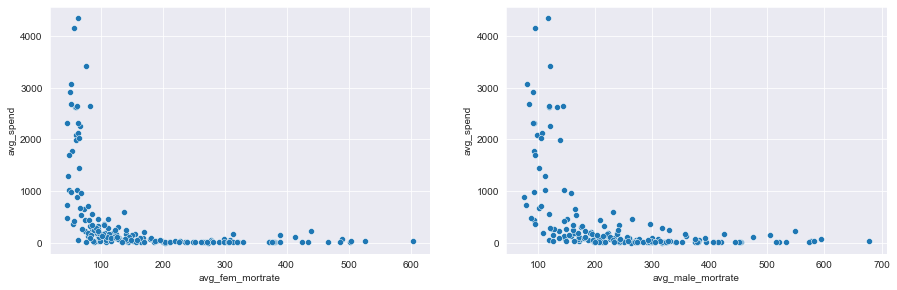

In [123]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))

plt.subplot(221)
k1 = sns.scatterplot('avg_fem_mortrate','avg_spend',data=health_comb)


plt.subplot(222)
k2 = sns.scatterplot('avg_male_mortrate','avg_spend',data=health_comb)




In [124]:
top20 = health_comb.nlargest(20,['avg_spend'])

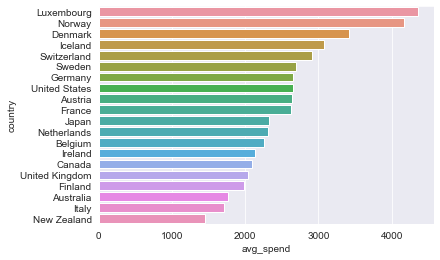

In [125]:
sns.barplot(x='avg_spend', y='country', data=top20)


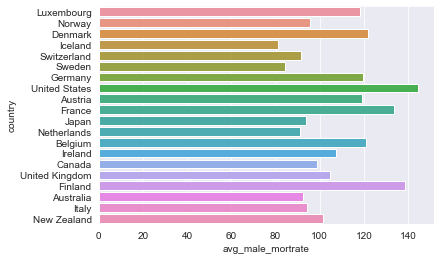

In [126]:
sns.barplot(x='avg_male_mortrate', y='country', data=top20)

C:\Users\jleeb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jleeb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


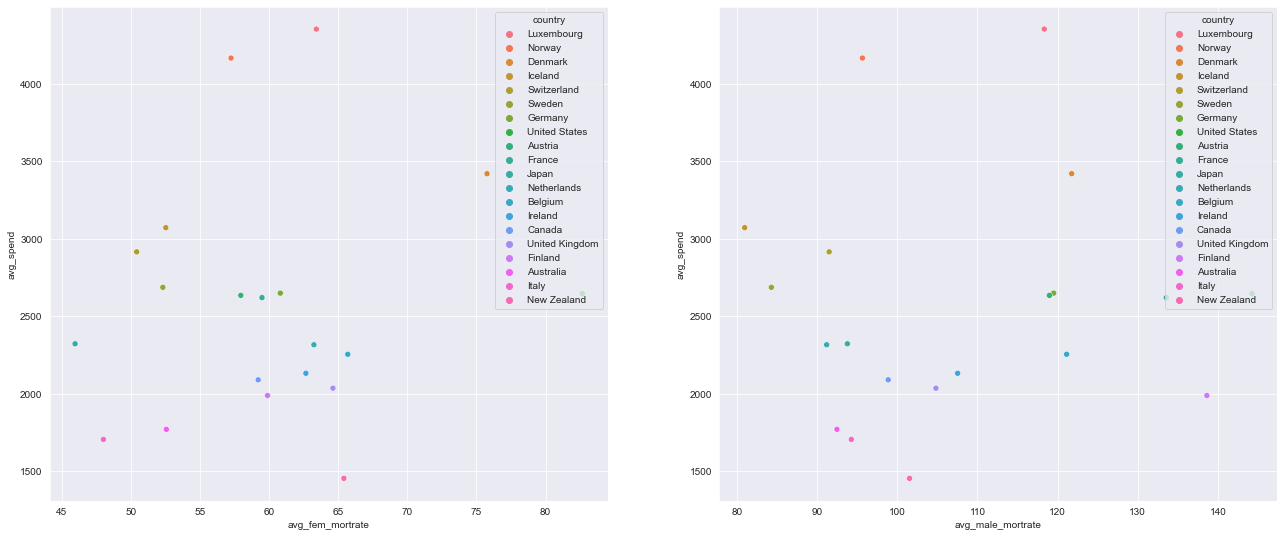

In [483]:
sns.set_style('darkgrid')
plt.figure(figsize=(22,20))

plt.subplot(221)
k1 = sns.scatterplot('avg_fem_mortrate','avg_spend',data=top20, hue='country')


plt.subplot(222)
k2 = sns.scatterplot('avg_male_mortrate','avg_spend',data=top20, hue='country')

In [484]:
bottom20 = health_comb.nsmallest(20,['avg_spend'])

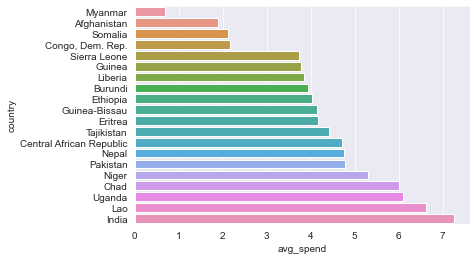

In [485]:
sns.barplot(x='avg_spend', y='country', data=bottom20)

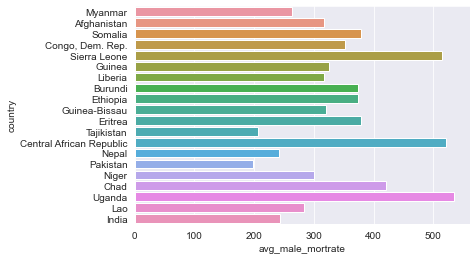

In [486]:
sns.barplot(x='avg_male_mortrate', y='country', data=bottom20)